This notebook is used to recreate the deterministic plots made by Chris in the same style as my ones.

The figure replicated here is currently Figure 2 in the bftt paper

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patheffects as pe
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "Times New Roman"
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

## Figure 1

In [2]:
# data used for figure 2a
solid_curve_data_2a = pd.read_csv('chris_deterministic_figure/Fig2a_SolidCurve_correctScaling.dat', delimiter=' ', header=None, names=['rdetK/rim', 'Nfp'], comment='#')
dashed_curve_data_2a = pd.read_csv('chris_deterministic_figure/Fig2a_DashedCurve_correctScaling.dat', delimiter=' ', header=None, names=['rdetK/rim', 'Nfp'], comment='#')
dots_data_2a = pd.read_csv('chris_deterministic_figure/Fig2a_points_correctScaling.dat', sep=r"\s+", engine='python', names=['rdetK/rim', 'N*/K', 'colour'], header=None, comment='#')

# data for figure 2b - this was recoloured. now blue = grey, orange = pink
blue_triangle_data_2b = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/solved_full_rm0.1_rd0.6_ri0.8.dat', header=None, sep=r"\s+")
blue_circle_data_2b = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/solved_full_rm0.8_rd0.6_ri0.8.dat', header=None, sep=r"\s+")
orange_triangle_data_2b = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/solved_full_rm0.1_rd1.1_ri0.8.dat', header=None, sep=r"\s+")
orange_circle_data_2b = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/solved_full_rm0.8_rd1.1_ri0.8.dat', header=None, sep=r"\s+")

# data for figure 2c
purple_lines_data_2c = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/dynamics_rm0.8_rd0.4_ri0.8_ns1.17.dat', header=None, sep=r"\s+")
purple_dots_data_2c = purple_lines_data_2c[(purple_lines_data_2c[0] > 0.1) & (purple_lines_data_2c[1] < 0.00129)] # get the points where new microhabs added
green_lines_data_2c = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/dynamics_rm0.8_rd0.5_ri0.8_ns1.17.dat', header=None, sep=r"\s+")
green_dots_data_2c = green_lines_data_2c[(green_lines_data_2c[0] > 0.1) & (green_lines_data_2c[1] < 0.002)]
blue_lines_data_2c = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/dynamics_rm0.8_rd0.6_ri0.8_ns1.17.dat', header=None, sep=r"\s+")

# data for figure 2d
orange_lines_data_2d = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/dynamics_rm0.8_rd1.1_ri0.8_ns0.8.dat', header=None, sep=r"\s+")
orange_dots_data_2d = orange_lines_data_2d[(orange_lines_data_2d[0] > 0.1) & (orange_lines_data_2d[1] < 0.0012)]
red_lines_data_2d = pd.read_csv('chris_deterministic_figure/Fig2Data_forPatrick/dynamics_rm0.8_rd1.3_ri0.8_ns0.8.dat', header=None, sep=r"\s+")

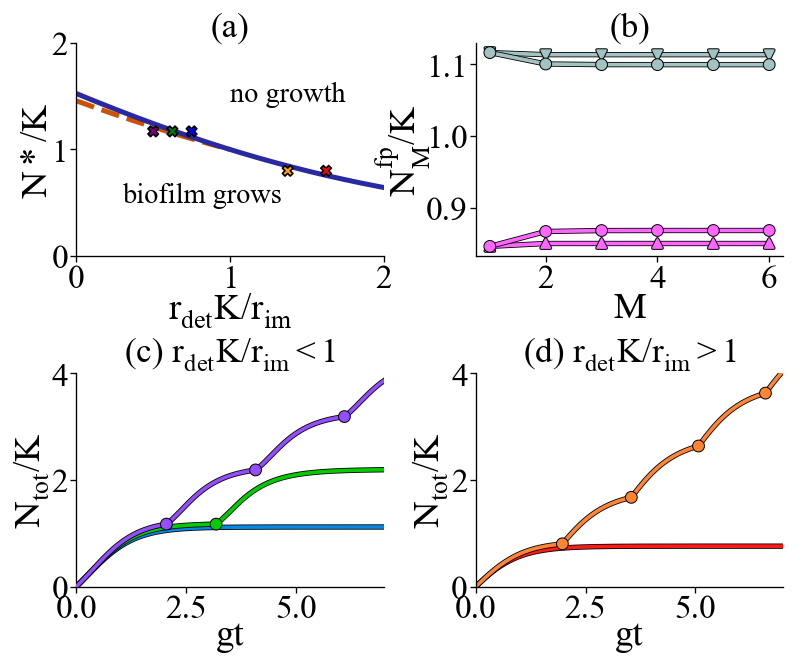

In [3]:
fig, axarr = plt.subplots(2, 2, dpi=120)
fig.set_size_inches(7.6, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.55)

labelsize=22
titlesize=21

line_width=2.2

axarr = axarr.flatten()

for ax in axarr:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', labelsize=20, pad=1.4)

# FIGURE 2A
axarr[0].plot(solid_curve_data_2a['rdetK/rim'], solid_curve_data_2a['Nfp'], lw=3., zorder=0, c='#2929a3')
axarr[0].plot(dashed_curve_data_2a['rdetK/rim'], dashed_curve_data_2a['Nfp'], lw=3., ls='--', zorder=-10, c='#cc5200')
axarr[0].scatter(dots_data_2a['rdetK/rim'], dots_data_2a['N*/K'], color=dots_data_2a['colour'], edgecolor='k', s=40, zorder=100, marker='X')
axarr[0].text(1., 1.45, 'no growth', fontsize=17)
axarr[0].text(0.3, 0.5, 'biofilm grows', fontsize=17)
axarr[0].set_xlabel('$r_{det}K/r_{im}$', fontsize=labelsize, labelpad=-2)
axarr[0].set_ylabel('$N*/K$', fontsize=labelsize, labelpad=-2)
axarr[0].set_title('(a)', fontsize=titlesize, pad=-2)
axarr[0].set_xlim(0, 2)
axarr[0].set_ylim(0, 2)


# FIGURE 2B
m_size = 5
axarr[1].plot(blue_triangle_data_2b[0], blue_triangle_data_2b[1], color='#a3c2c2', lw=line_width, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()], zorder=0)
axarr[1].scatter(blue_triangle_data_2b[0], blue_triangle_data_2b[1], marker='v', color='#a3c2c2', s=30, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()], zorder=1)
axarr[1].plot(blue_circle_data_2b[0], blue_circle_data_2b[1], color='#a3c2c2', lw=line_width, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()], zorder=10)
axarr[1].scatter(blue_circle_data_2b[0], blue_circle_data_2b[1], marker='o', color='#a3c2c2', s=30, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()], zorder=11)
axarr[1].plot(orange_triangle_data_2b[0], orange_triangle_data_2b[1], color='#ff66ff', lw=line_width, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()], zorder=20)
axarr[1].scatter(orange_triangle_data_2b[0], orange_triangle_data_2b[1], marker='^', color='#ff66ff', s=30, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()], zorder=21)
axarr[1].plot(orange_circle_data_2b[0], orange_circle_data_2b[1], color='#ff66ff', lw=line_width, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()], zorder=30)
axarr[1].scatter(orange_circle_data_2b[0], orange_circle_data_2b[1], marker='o', color='#ff66ff', s=30, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()], zorder=31)
axarr[1].set_title('(b)', fontsize=titlesize, pad=-2)
axarr[1].set_xlabel('$M$', fontsize=labelsize, labelpad=-2)
axarr[1].set_ylabel('$N^{fp}_M/K$', fontsize=labelsize, labelpad=-4)

# FIGURE 2C
axarr[2].plot(purple_lines_data_2c[0], purple_lines_data_2c[2], lw=line_width, color='#944dff', zorder=10, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()])
axarr[2].scatter(purple_dots_data_2c[0], purple_dots_data_2c[2], s=30, marker='o', color='#944dff', zorder=11, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()])
axarr[2].plot(green_lines_data_2c[0], green_lines_data_2c[2], lw=line_width, color='#00cc00', zorder=0, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()])
axarr[2].scatter(green_dots_data_2c[0], green_dots_data_2c[2], s=30, marker='o', color='#00cc00', zorder=1, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()])
axarr[2].plot(blue_lines_data_2c[0], blue_lines_data_2c[2], lw=line_width, color='#008ae6', zorder=-9, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()])
axarr[2].set_title('(c) $r_{det}K/r_{im} < 1$', fontsize=titlesize, pad=-2)
axarr[2].set_xlabel('gt', fontsize=labelsize, labelpad=-4)
axarr[2].set_ylabel('N$_{tot}$/K', fontsize=labelsize, labelpad=0.5)
axarr[2].set_ylim(0, 4)
axarr[2].set_xlim(0, 7)


# FIGURE 2D
axarr[3].plot(orange_lines_data_2d[0], orange_lines_data_2d[2], lw=line_width, color='#ff8533', zorder=0, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()])
axarr[3].scatter(orange_dots_data_2d[0], orange_dots_data_2d[2], s=30, marker='o', color='#ff8533', zorder=1, path_effects=[pe.Stroke(linewidth=line_width, foreground='k'), pe.Normal()])
axarr[3].plot(red_lines_data_2d[0], red_lines_data_2d[2], lw=line_width, color='#ff1a1a', zorder=-11, path_effects=[pe.Stroke(linewidth=line_width+1, foreground='k'), pe.Normal()])
axarr[3].set_title('(d) $r_{det}K/r_{im} > 1$', fontsize=titlesize, pad=-2)
axarr[3].set_xlabel('gt', fontsize=labelsize, labelpad=-4)
axarr[3].set_ylabel('N$_{tot}$/K', fontsize=labelsize, labelpad=0.5)
axarr[3].set_ylim(0, 4)
axarr[3].set_xlim(0, 7)

plt.savefig('paper_plots/deterministc_fig_recreation.pdf', bbox_inches='tight', dpi=420)
plt.show()

## Figure S1

This figure is made of two sets of equations, as below.

In [4]:
def Np(d, i):
    # d = r_det/g
    # i = r_im/(Kg)
    return (1-d)*(0.5+0.5*np.sqrt(1+(4*i)/(1-d)**2))

def Nm(d, i):
    
    return (1-d)*(0.5-0.5*np.sqrt(1+(4*i)/(1-d)**2))
    
r_imm_vals = np.linspace(0, 5, 200) # values of r_Imm/Kg used for supplementary figure 1

In [5]:
purple_line_s1 = Np(0.1, r_imm_vals)
green_line_s1 = Np(0.5, r_imm_vals)
blue_line_s1 = Nm(2, r_imm_vals)
yellow_line_s1 = Nm(5, r_imm_vals)

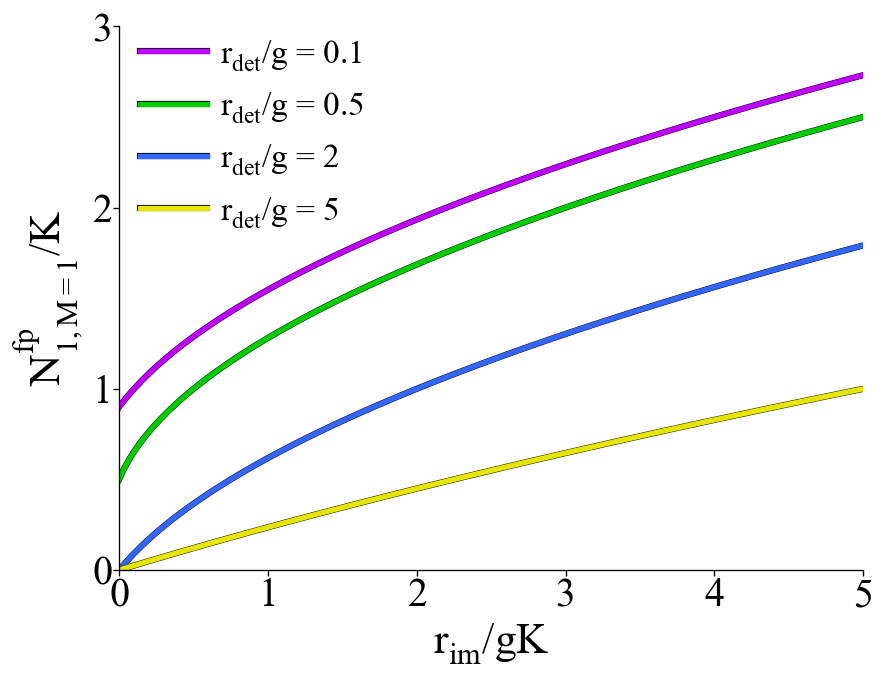

In [6]:
fig, ax = plt.subplots(dpi=120)
fig.set_size_inches(8, 6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=24, pad=0.8)

lw = 3.2
label_prefix = '$r_{det}/g$ = '

ax.plot(r_imm_vals, purple_line_s1, lw=lw, color='#bf00ff', label=label_prefix+'0.1', path_effects=[pe.Stroke(linewidth=line_width+1.5, foreground='k'), pe.Normal()])
ax.plot(r_imm_vals, green_line_s1, lw=lw, color='#00cc00', label=label_prefix+'0.5', path_effects=[pe.Stroke(linewidth=line_width+1.5, foreground='k'), pe.Normal()])
ax.plot(r_imm_vals, blue_line_s1, lw=lw, color='#3366ff', label=label_prefix+'2', path_effects=[pe.Stroke(linewidth=line_width+1.5, foreground='k'), pe.Normal()])
ax.plot(r_imm_vals, yellow_line_s1, lw=lw, color='#e6e600', label=label_prefix+'5', path_effects=[pe.Stroke(linewidth=line_width+1.5, foreground='k'), pe.Normal()])

ax.set_xlabel('$r_{im}/gK$', fontsize=26)
ax.set_ylabel('$N^{fp}_{1, M=1}/K$', fontsize=26)

ax.set_xlim(0, 5)
ax.set_ylim(0, 3)

ax.yaxis.set_major_locator(plt.MaxNLocator(3))

ax.legend(fontsize=20, handletextpad=0.4, frameon=False, loc=(0.01, 0.6))

plt.savefig('paper_plots/supplementary_1MH_solution_patrick.pdf', bbox_inches='tight', dpi=420)
plt.show()

## Figure S2

At the time of writing, this figure was the one with 3 subplots above 2 subplots.

In [7]:
def f(m, N0):
    return 2.0/m*(N0*(m/2.0 - 1) + N0*N0)

def g(m, i, d, N1):
    return 2.0/m*(N1*(m/2.0 - 1 + d) + N1*N1 -i)

In [8]:
N1_vals = np.linspace(0, 2, 101)

# (a) lines
s2_a_orange_data = g(m=0.9, i=0.5, d=0.75, N1=N1_vals)
s2_a_yellow_data = g(m=0.9, i=1.0, d=0.75, N1=N1_vals)
s2_a_blue_data   = g(m=0.9, i=2.0, d=0.75, N1=N1_vals)
s2_a_teal_data   = f(m=0.9, N0=N1_vals)

# (b) lines
s2_b_orange_data = g(m=0.9, i=0.75, d=0.5, N1=N1_vals)
s2_b_yellow_data = g(m=0.9, i=0.75, d=1.0, N1=N1_vals)
s2_b_blue_data   = g(m=0.9, i=0.75, d=2.0, N1=N1_vals)
s2_b_teal_data   = f(m=0.9, N0=N1_vals)

# (c) lines
s2_c_orange_data = np.ones_like(N1_vals)
s2_c_purple_data = f(0.2, N1_vals)
s2_c_blue_data   = f(0.6, N1_vals)
s2_c_teal_data   = f(0.9, N1_vals)

# (d) lines 
s2_d_data = pd.read_csv('chris_deterministic_figure/FigS2Data_forPatrick/MH2_im0.5_det0.1.dat', header=None, sep=r"\s+")
s2_d_red_data = np.ones_like(N1_vals)*np.max([Np(0.1, 0.5), Nm(0.1, 0.5)])

# (e) lines
s2_e_data = pd.read_csv('chris_deterministic_figure/FigS2Data_forPatrick/MH2_im0.1_det0.5.dat', header=None, sep=r"\s+")
s2_e_red_data = np.ones_like(N1_vals)*np.max([Np(0.5, 0.1), Nm(0.5, 0.1)])

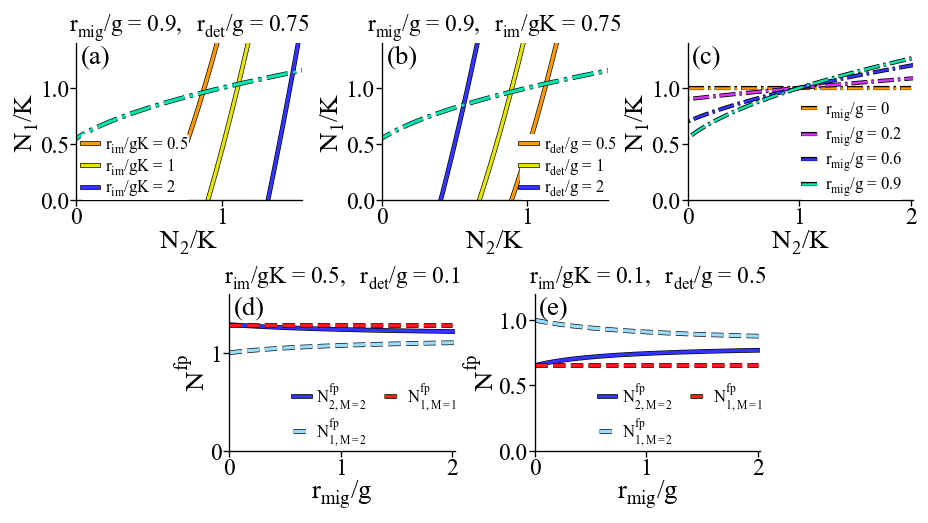

In [9]:
fig = plt.figure(dpi=120)
fig.set_size_inches(9, 4.5)
gs = gridspec.GridSpec(2, 6)

ax_dict = {}
letters = ['a', 'b', 'c', 'd', 'e']

for i in range(0, 5):
    if i < 3:
        ax = plt.subplot(gs[0, 2 * i:2 * i + 2])
    else:
        ax = plt.subplot(gs[1, 2 * i - 5:2 * i + 2 - 5])
        
    ax_dict[letters[i]] = ax
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.986), xycoords='axes fraction', fontsize=16, horizontalalignment='left', verticalalignment='top')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', labelsize=14, pad=0.8)
      
plt.subplots_adjust(wspace=1.1, hspace=0.6)

labelsize=16
titlesize=14
legendsize=10

lw = 2.
orange = '#ff9900'
yellow = '#e6e600'
blue   = '#3333ff'
teal   = '#00e6ac'
purple = '#d633ff'
light_blue = '#99ddff'
red = '#ff1a1a'

# plot (a)
legend_prefix = '$r_{im}/gK$ = '
ax_dict['a'].plot(N1_vals, s2_a_orange_data, lw=lw, color=orange, label=legend_prefix+'0.5', path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()])
ax_dict['a'].plot(N1_vals, s2_a_yellow_data, lw=lw, color=yellow, label=legend_prefix+'1', path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()])
ax_dict['a'].plot(N1_vals, s2_a_blue_data,   lw=lw, color=blue,   label=legend_prefix+'2',   path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()])
ax_dict['a'].plot(s2_a_teal_data, N1_vals,   lw=lw, color=teal, path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()], ls='-.')
ax_dict['a'].set_xlabel('$N_2/K$', fontsize=labelsize, labelpad=-1)
ax_dict['a'].set_ylabel('$N_1/K$', fontsize=labelsize, labelpad=-0.5)
ax_dict['a'].set_title('$r_{mig}/g$ = 0.9, $\,$ $r_{det}/g$ = 0.75', fontsize=titlesize)
ax_dict['a'].set_xlim(0, 1.55)
ax_dict['a'].set_ylim(0, 1.4)
ax_dict['a'].legend(frameon=True, loc=(0.02,0.00), handletextpad=0.4, facecolor='white', framealpha=1, fontsize=legendsize, 
                    borderpad=0.05, edgecolor='none', handlelength=1, labelspacing=0.1)


# plot (b)
legend_prefix = '$r_{det}/g$ = '
ax_dict['b'].plot(N1_vals, s2_b_orange_data, lw=lw, color=orange, label=legend_prefix+'0.5', path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()])
ax_dict['b'].plot(N1_vals, s2_b_yellow_data, lw=lw, color=yellow, label=legend_prefix+'1', path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()])
ax_dict['b'].plot(N1_vals, s2_b_blue_data,   lw=lw, color=blue,   label=legend_prefix+'2',   path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()])
ax_dict['b'].plot(s2_b_teal_data, N1_vals,   lw=lw, color=teal, path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()], ls='-.')
ax_dict['b'].set_xlabel('$N_2/K$', fontsize=labelsize, labelpad=-1)
ax_dict['b'].set_ylabel('$N_1/K$', fontsize=labelsize, labelpad=-0.5)
ax_dict['b'].set_title('$r_{mig}/g$ = 0.9, $\,$ $r_{im}/gK$ = 0.75', fontsize=titlesize)
ax_dict['b'].set_xlim(0, 1.55)
ax_dict['b'].set_ylim(0, 1.4)
ax_dict['b'].legend(frameon=True, loc=(0.61,0.00), handletextpad=0.4, facecolor='white', framealpha=1, fontsize=legendsize, 
                    borderpad=0.05, edgecolor='none', handlelength=1, labelspacing=0.1)


# plot (c)
legend_prefix = '$r_{mig}/g$ = '
ax_dict['c'].plot(N1_vals, s2_c_orange_data, lw=lw-0.5, color=orange, ls='-.', label=legend_prefix+'0',   path_effects=[pe.Stroke(linewidth=line_width+0.3, foreground='k'), pe.Normal()])
ax_dict['c'].plot(s2_c_purple_data, N1_vals, lw=lw-0.5, color=purple, ls='-.', label=legend_prefix+'0.2', path_effects=[pe.Stroke(linewidth=line_width+0.3, foreground='k'), pe.Normal()])
ax_dict['c'].plot(s2_c_blue_data,   N1_vals, lw=lw-0.5, color=blue, ls='-.',   label=legend_prefix+'0.6', path_effects=[pe.Stroke(linewidth=line_width+0.3, foreground='k'), pe.Normal()])
ax_dict['c'].plot(s2_c_teal_data,   N1_vals, lw=lw-0.5, color=teal, ls='-.',   label=legend_prefix+'0.9', path_effects=[pe.Stroke(linewidth=line_width+0.3, foreground='k'), pe.Normal()])
ax_dict['c'].set_xlabel('$N_2/K$', fontsize=labelsize, labelpad=-1)
ax_dict['c'].set_ylabel('$N_1/K$', fontsize=labelsize, labelpad=-0.5)
ax_dict['c'].set_xlim(0, 2.02)
ax_dict['c'].set_ylim(0, 1.4)
ax_dict['c'].legend(frameon=True, loc=(0.5,0.00), handletextpad=0.4, facecolor='white', framealpha=1, fontsize=legendsize, 
                    borderpad=0.05, edgecolor='none', handlelength=1, labelspacing=0.1)


# plot (d)
ax_dict['d'].plot(s2_d_data[0], s2_d_data[2], lw=lw, color=blue, label='$N^{fp}_{2, M=2}$', path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()])
ax_dict['d'].plot(s2_d_data[0], s2_d_data[1], lw=lw, color=light_blue, ls='--', label='$N^{fp}_{1, M=2}$', path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()])
ax_dict['d'].plot(N1_vals, s2_d_red_data,     lw=lw, color=red, ls='--', label='$N^{fp}_{1, M=1}$', path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()])
ax_dict['d'].set_title('$r_{im}/gK$ = 0.5, $\,$ $r_{det}/g$ = 0.1', fontsize=titlesize)
ax_dict['d'].set_xlabel('$r_{mig}/g$', fontsize=labelsize, labelpad=-1)
ax_dict['d'].set_ylabel('$N^{fp}$', fontsize=labelsize, labelpad=-0.5)
ax_dict['d'].set_xlim(0, 2.02)
ax_dict['d'].set_ylim(0, 1.6)
ax_dict['d'].legend(frameon=True, loc=(0.28,0.01), handletextpad=0.4, facecolor='white', framealpha=1, fontsize=legendsize, 
                    borderpad=0.05, edgecolor='none', handlelength=1, labelspacing=0.1, ncol=2, columnspacing=1)


ax_dict['e'].plot(s2_e_data[0], s2_e_data[2], lw=lw, color=blue, label='$N^{fp}_{2, M=2}$', path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()])
ax_dict['e'].plot(s2_e_data[0], s2_e_data[1], lw=lw, color=light_blue, ls='--', label='$N^{fp}_{1, M=2}$', path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()])
ax_dict['e'].plot(N1_vals, s2_e_red_data,     lw=lw, color=red, ls='--', label='$N^{fp}_{1, M=1}$', path_effects=[pe.Stroke(linewidth=line_width+0.6, foreground='k'), pe.Normal()])
ax_dict['e'].set_title('$r_{im}/gK$ = 0.1, $\,$ $r_{det}/g$ = 0.5', fontsize=titlesize)
ax_dict['e'].set_xlabel('$r_{mig}/g$', fontsize=labelsize, labelpad=-1)
ax_dict['e'].set_ylabel('$N^{fp}$', fontsize=labelsize, labelpad=-0.5)
ax_dict['e'].set_xlim(0, 2.02)
ax_dict['e'].set_ylim(0, 1.2)
ax_dict['e'].legend(frameon=True, loc=(0.28,0.01), handletextpad=0.4, facecolor='white', framealpha=1, fontsize=legendsize, 
                    borderpad=0.05, edgecolor='none', handlelength=1, labelspacing=0.1, ncol=2, columnspacing=1)


plt.savefig('paper_plots/supplementary_2MH_solution_patrick.pdf', bbox_inches='tight', dpi=420)
plt.show()

## Figure S3

This is the 2x4 one about varying parameters.

In [10]:
s3_gRate_rImm     = pd.read_csv('chris_deterministic_figure/FigS3Data_forPatrick/longer_runs_rates_rm0.8_rd0.8_Nstar0.8.dat', header=None, sep=r"\s+")
s3_gRate_rDet     = pd.read_csv('chris_deterministic_figure/FigS3Data_forPatrick/longer_runs_rates_ri0.8_rm0.8_Nstar0.8.dat', header=None, sep=r"\s+")
s3_gRate_rMig     = pd.read_csv('chris_deterministic_figure/FigS3Data_forPatrick/longer_runs_rates_ri0.8_rd0.8_Nstar0.8.dat', header=None, sep=r"\s+")
s3_gRate_N_thresh = pd.read_csv('chris_deterministic_figure/FigS3Data_forPatrick/longer_runs_rates_ri0.8_rm0.8_rd0.8.dat',    header=None, sep=r"\s+")

s3_t1_rImm     = pd.read_csv('chris_deterministic_figure/FigS3Data_forPatrick/longer_runs_t2f_rm0.8_rd0.8_Nstar0.8.dat', header=None, sep=r"\s+", comment='#')
s3_t1_rDet     = pd.read_csv('chris_deterministic_figure/FigS3Data_forPatrick/longer_runs_t2f_rim0.8_rm0.8_Nstar0.8.dat', header=None, sep=r"\s+", comment='#')
s3_t1_rMig     = pd.read_csv('chris_deterministic_figure/FigS3Data_forPatrick/longer_runs_t2f_rim0.8_rd0.8_Nstar0.8.dat', header=None, sep=r"\s+", comment='#')
s3_t1_N_thresh = pd.read_csv('chris_deterministic_figure/FigS3Data_forPatrick/longer_runs_t2f_rim0.8_rm0.8_rd0.8.dat',    header=None, sep=r"\s+", comment='#')

s3_data_list = [s3_gRate_rImm, s3_gRate_rDet, s3_gRate_rMig, s3_gRate_N_thresh, s3_t1_rImm, s3_t1_rDet, s3_t1_rMig, s3_t1_N_thresh]

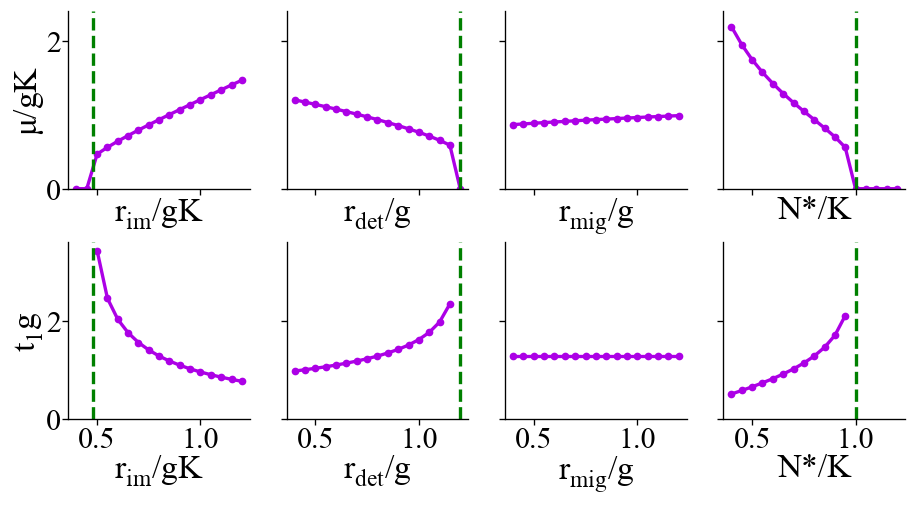

In [15]:
fig, axarr = plt.subplots(2, 4, dpi=120, sharex='col', sharey='row')
fig.set_size_inches(9, 4.5)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

axarr = axarr.flatten()

labelsize=20
titlesize=21
line_width=2.2

x_label_list = ['$r_{im}/gK$', '$r_{det}/g$', '$r_{mig}/g$', 'N*/K']

# values for no biofilm limits for each plot column
no_biofilm_lines = [0.48, 1.2, None, 1.]


for i, ax in enumerate(axarr):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', labelsize=18, pad=0.8)
    
    ax.plot(s3_data_list[i][0], s3_data_list[i][1], lw=lw, marker='o', markersize=3.6, color='#ac00e6')
    
    if i < 4: 
        if i == 0: ax.set_ylabel('$\\mu/gK$', fontsize=labelsize, labelpad=0)
        ax.set_ylim(0, 2.4)
        ax.set_xlabel(x_label_list[i%4], fontsize=labelsize, labelpad=4)
    else: 
        if i == 4: ax.set_ylabel('$t_1 g$', fontsize=labelsize, labelpad=0)
        ax.set_ylim(0, 3.6)
    
        ax.set_xlabel(x_label_list[i%4], fontsize=labelsize, labelpad=0.)
        
    # add the lines representing no biofilm growth
    if no_biofilm_lines[i%4]:
        ax.axvline(no_biofilm_lines[i%4], lw=lw, color='#008000', ls='--')
        
    #ax.label_outer()

plt.savefig('paper_plots/supplementary_longerSims_patrick_limit_line.pdf', bbox_inches='tight', dpi=420)
plt.show()
    
    

In [12]:
s3_t1_rImm

,0,1
0,0.50,3.422
1,0.55,2.453
2,0.60,2.027
3,0.65,1.754
4,0.70,1.556
5,0.75,1.404
6,0.80,1.281
7,0.85,1.180
8,0.90,1.095
9,0.95,1.021
